# Christopher Murphy

## A. Cucchiaria 

### December 2018

In [213]:
import numpy as np

import matplotlib.pyplot as plt
import glob
#%matplotlib inline
import pyfits
import scipy.optimize as optimization
from scipy.optimize import curve_fit
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times']})

In [214]:
datadir = "/Users/chrismurphy/Desktop/Research/imageProcessing/flats/"

In [215]:
biglist_flat=glob.glob(datadir+'Flat*')

In [216]:
print(biglist_flat)

['/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0030.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0024.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0018.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0019.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0025.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0031.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0027.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0033.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0032.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0026.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0142.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0022.fts', '/Users/chrismurphy/Desktop/Research/imageProcessing/flats/Flat-0036.fts', '/Users/chrismurphy/Desk

In [251]:
# Temperatures seem to all be -25
# Exposure times: 0.01, 0.1, 0.15, 0.5, 1.0, 2.0, 4.0, 5.0, 6.0, 10.0

exptimesandtemps = []
for e in biglist_flatc:
    myfile=pyfits.open(e)
    head1=myfile[0].header
#     print(float(head1['EXPTIME']))
#     print(head1)
#     print(float(head1['CAMTEMP']))

In [218]:
def createlist(bl, E, T):
    uList = []
    rList = []
    for flat in bl:
        myfile=pyfits.open(flat)
        head1=myfile[0].header
        if float(head1['EXPTIME']) == E and float(head1['CAMTEMP']) == T and head1['Filter'] == 'U':
            uList.append(flat)
        if float(head1['EXPTIME']) == E and float(head1['CAMTEMP']) == T and head1['Filter'] == 'R':
            rList.append(flat)
    return uList, rList

In [219]:
worklist1U, worklist1R= createlist(biglist_flatc, 0.01, -25)
worklist2U, worklist2R = createlist(biglist_flatc, 0.1, -25)
worklist3U, worklist3R = createlist(biglist_flatc, 0.15, -25)
worklist4U, worklist4R = createlist(biglist_flatc, 0.5, -25)
worklist5U, worklist5R = createlist(biglist_flatc, 1.0, -25)
worklist6U, worklist6R = createlist(biglist_flatc, 2.0, -25)
worklist7U, worklist7R = createlist(biglist_flatc, 4.0, -25)
worklist8U, worklist8R = createlist(biglist_flatc, 5.0, -25)
worklist9U, worklist9R = createlist(biglist_flatc, 6.0, -25)
worklist10U, worklist10R = createlist(biglist_flatc, 10.0, -25)

In [250]:
print(worklist10U)

[]


### Exposure times: 
### 1 = 0.01
### 2 = 0.1
### 3 = 0.15
### 4 = 0.5
### 5 = 1.0
### 6 = 2.0
### 7 = 4.0
### 8 = 5.0
### 9 = 6.0
### 10 = 10.0
### R has exposures at 10, 9, 7, 6, 5
### U has exposures at 1, 2, 3, 4, 5

In [222]:
def calcmed(wl):    
    med_counts = []
    for flat in wl:
        myfile=pyfits.open(flat)
        med_counts.append(float(np.median(myfile[0].data)))
        myfile.close()
    return np.median(med_counts), np.std(med_counts)

In [223]:
#Us
med1U, std1U= calcmed(worklist1U)
med2U, std2U = calcmed(worklist2U)
med3U, std3U= calcmed(worklist3U)
med4U, std4U = calcmed(worklist4U)
med5U, std5U= calcmed(worklist5U)

meds_flatu = [med1U, med2U, med3U, med4U, med5U]
stds_flatu = [std1U, std2U, std3U, std4U, std5U]

In [224]:
#Rs
med5R, std5R= calcmed(worklist5R)
med6R, std6R = calcmed(worklist6R)
med7R, std7R= calcmed(worklist7R)
med9R, std9R = calcmed(worklist9R)
med10R, std10R= calcmed(worklist10R)

meds_flatr = [med5R, med6R, med7R, med9R, med10R]
stds_flatr = [std5R, std6R, std7R, std9R, std10R]

In [226]:
exposuresU = [0.01, 0.1, 0.15, 0.5, 1.0]
exposuresR = [1.0, 2.0, 4.0, 6.0, 10.0]

In [227]:
print(stds_flatr, stds_flatu)
print('++++++++++')
print(meds_flatr, meds_flatu)
print('++++++++++')
print(exposuresU, exposuresR)

[2642.0, 3173.728348982643, 1515.701210661257, 0.0, 6439.135963776506] [0.0, 9522.732542549069, 0.0, 0.0, 9991.062309564171]
++++++++++
[14006.0, 24537.0, 27411.0, 33684.0, 37621.5] [1111.0, 30425.0, 35306.0, 51871.0, 49686.5]
++++++++++
[0.01, 0.1, 0.15, 0.5, 1.0] [1.0, 2.0, 4.0, 6.0, 10.0]


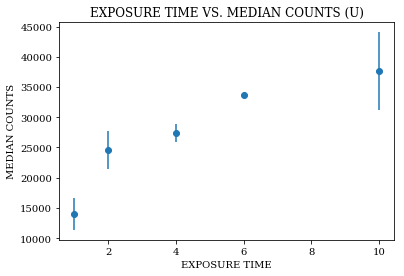

In [228]:
#R
x = exposuresR
y = meds_flatr
e = stds_flatr
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (U)")
plt.show()

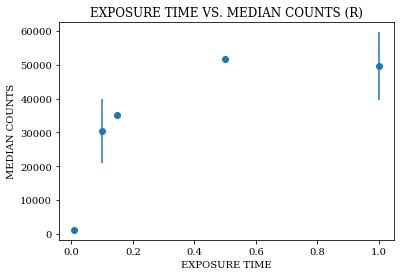

In [229]:
#U
x = exposuresU
y = meds_flatu
e = stds_flatu
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (R)")
plt.show()

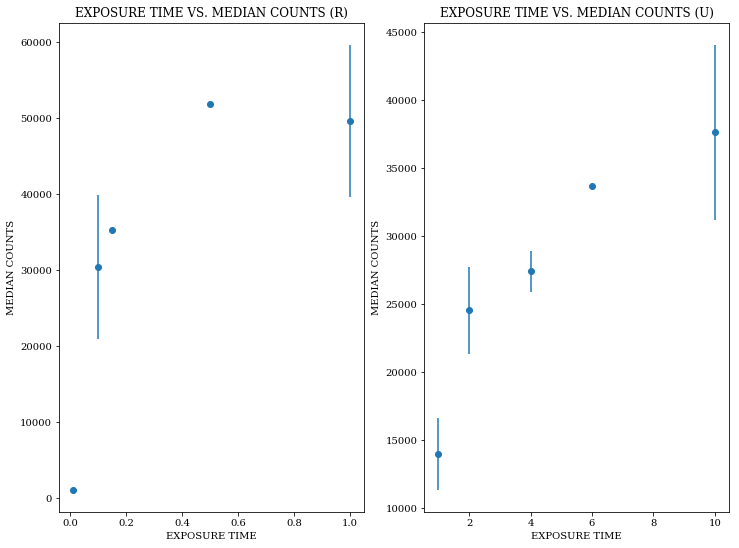

In [231]:
plt.figure(figsize = (12, 9))
plt.subplot(1,2,1)

x = exposuresU
y = meds_flatu
e = stds_flatu
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (R)")


plt.subplot(1,2,2)
x = exposuresR
y = meds_flatr
e = stds_flatr
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (U)")


#plt.savefig("FLATC VS FLATR.pdf")
plt.show()

In [232]:
def func(x, m, n):
    return m +(x*n)

In [238]:
best_fit_r = optimization.curve_fit(func, exposuresR, meds_flatr)
print(best_fit_r)

(array([16702.15820312,  2336.90039062]), array([[10618327.0786963 , -1555551.10603241],
       [-1555551.10603241,   338163.28507915]]))


In [239]:
best_fit_u = optimization.curve_fit(func, exposuresU, meds_flatu)
print(best_fit_u)

(array([20570.47149454, 37242.69475809]), array([[ 9.56056930e+07, -1.31191345e+08],
       [-1.31191345e+08,  3.72702684e+08]]))


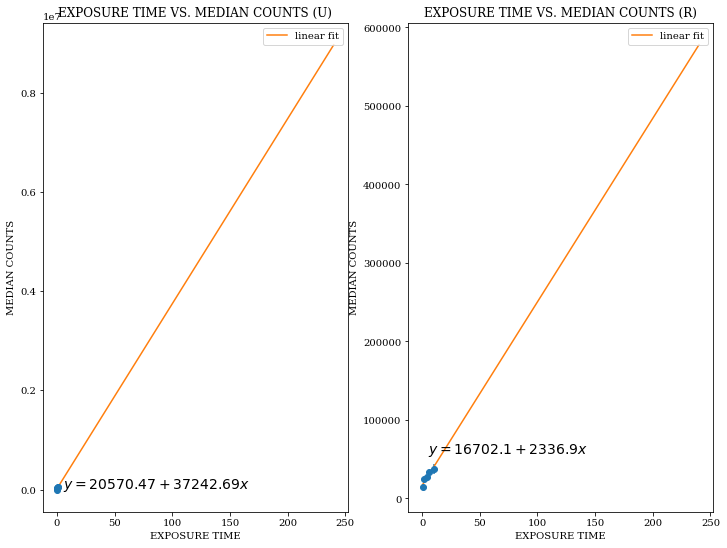

In [247]:
plt.figure(figsize = (12, 9))
plt.subplot(1,2,1)

x = exposuresU
y = meds_flatu
e = stds_flatu
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (U)")
plt.text(5,35000,r'$y=20570.47+37242.69 x$', fontsize=14)
xval=np.arange(0.1,250,10)
plt.plot(xval, 20570.47149454 + ((37242.69475809)* xval), label='linear fit')
plt.legend()

plt.subplot(1,2,2)
x = exposuresR
y = meds_flatr
e = stds_flatr
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDIAN COUNTS"), plt.title("EXPOSURE TIME VS. MEDIAN COUNTS (R)")
plt.text(5,58000,r'$y=16702.1+2336.9 x$', fontsize=14)
xval=np.arange(0.1,250,10)
plt.plot(xval, 16702.1 + ((2336.9)* xval),label='linear fit')
plt.legend()
plt.show()